Исследование зависимости рейтинга актера от возраста (года рожения), страны рождения, количества и качества (рейтинга) фильмов в которых снимался, роли в фильме (главная, второстепенная).

In [2]:
import pandas as pd
import numpy as np

Обработка данных

In [ ]:
df = pd.read_csv('movie_metadata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3474 entries, 0 to 3473
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3466 non-null   object 
 1   director_name              3409 non-null   object 
 2   num_critic_for_reviews     3463 non-null   float64
 3   duration                   3470 non-null   float64
 4   director_facebook_likes    3409 non-null   float64
 5   actor_3_facebook_likes     3468 non-null   float64
 6   actor_2_name               3470 non-null   object 
 7   actor_1_facebook_likes     3474 non-null   int64  
 8   gross                      3177 non-null   float64
 9   genres                     3474 non-null   object 
 10  actor_1_name               3474 non-null   object 
 11  movie_title                3474 non-null   object 
 12  num_voted_users            3474 non-null   int64  
 13  cast_total_facebook_likes  3474 non-null   int64

Выборка из первых 10 актеров (без упорядочения). Количество лайков на ФБ -  рейтинг популярности.

In [ ]:
df_r = df[['actor_1_name','actor_1_facebook_likes']].iloc[1:11]
df_r = df_r.drop_duplicates()
df_r = df_r.rename(columns={'actor_1_name': 'name' , 'actor_1_facebook_likes': 'rate'})
df_r

,name,rate
1,Johnny Depp,40000
2,Christoph Waltz,11000
3,Tom Hardy,27000
4,Doug Walker,131
5,Daryl Sabara,640
6,J.K. Simmons,24000
7,Brad Garrett,799
8,Chris Hemsworth,26000
9,Alan Rickman,25000
10,Henry Cavill,15000


Max_movie_rate - максимальный рейтинг фильма с данным актером в главной роли

Movie_1_role - количество фильмов с данным актером в главной роли

Country - страна рождения

Age - возраст

Rate - рейтинг актера по количеству лайков на ФБ (особенности датасета)



In [ ]:
age = [59, 65, 44, 40, 30, 67, 62, 38, 69, 39]
movie_1_count = [294, 188, 103, 55, 87, 271, 199, 126, 126, 64]
max_rate = [8.35, 8.36, 8.66, 8.38, 8.36, 8.34, 8.67, 8.36, 8.48, 8.00]
country = ['USA', 'Austria', 'GB', 'Italy', 'USA', 'USA', 'USA', 'Australia', 'GB', 'Normandy']
country_rate = [0.4, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.1, 0.2, 0.1]
df_r['age'] = age
df_r['country'] = country
df_r['country_rate'] = country_rate
df_r['movie_1_role'] = movie_1_count
df_r['max_movie_rate'] = max_rate

df_r

,name,rate,age,country,country_rate,movie_1_role,max_movie_rate
1,Johnny Depp,40000,59,USA,0.4,294,8.35
2,Christoph Waltz,11000,65,Austria,0.1,188,8.36
3,Tom Hardy,27000,44,GB,0.2,103,8.66
4,Doug Walker,131,40,Italy,0.1,55,8.38
5,Daryl Sabara,640,30,USA,0.4,87,8.36
6,J.K. Simmons,24000,67,USA,0.4,271,8.34
7,Brad Garrett,799,62,USA,0.4,199,8.67
8,Chris Hemsworth,26000,38,Australia,0.1,126,8.36
9,Alan Rickman,25000,69,GB,0.2,126,8.48
10,Henry Cavill,15000,39,Normandy,0.1,64,8.00


In [ ]:
tab_cor = df_r.corr()
tab_cor

,rate,age,country_rate,movie_1_role,max_movie_rate
rate,1.000000,0.306002,0.062147,0.492837,-0.044773
age,0.306002,1.000000,0.262095,0.712886,0.288493
country_rate,0.062147,0.262095,1.000000,0.616750,0.312516
movie_1_role,0.492837,0.712886,0.616750,1.000000,0.162133
max_movie_rate,-0.044773,0.288493,0.312516,0.162133,1.000000


Как видно из матрицы корреляций присутствует зависимость рейтинга актера от количества фильмов с актером в главной роли и от максимального рейтинга фильма.Исходя из этого оценим зависимость рейтинга актера от количества фильмов.

Средние значения

In [ ]:
rate_mean = df_r['rate'].mean()
age_mean = df_r['age'].mean()
movie_1_role_mean = df_r['movie_1_role'].mean()
max_movie_rate_mean = df_r['max_movie_rate'].mean()
print(f'Rate mean = {rate_mean}\nAge mean = {age_mean}\nNumber of movies with 1 role = {movie_1_role_mean}\nMaximum movie rate = {max_movie_rate_mean}')

Rate mean = 16957.0
Age mean = 51.3
Number of movies with 1 role = 151.3
Maximum movie rate = 8.396


In [ ]:
rate = pd.Series(df_r['rate'])
movie = pd.Series(df_r['movie_1_role'])
n = len(rate)

Вычислим коэффициенты уравнения линейной регрессии

In [ ]:
X = rate
Y = movie

b = ((X * Y).mean() - (X.mean() * Y.mean())) / ((X**2).mean() - (X.mean())**2)
a = Y.mean() - b * X.mean()
print(f'y={a:.4f}+{b:.4f}*x')

y=100.1061+0.0030*x


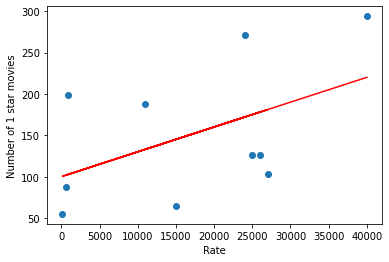

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.plot(X, 100.1061+0.0030*X, color='red')
plt.xlabel('Rate')
plt.ylabel('Number of 1 star movies')
plt.show()

Коэффициент корреляции и детерминации

In [ ]:
r = b * X.std() / Y.std()
R = r**2
R

0.24288795250321146

Предсказание Y исходя из известных X

In [ ]:
X_new = df[['actor_1_name','actor_1_facebook_likes']].iloc[131:141]
X_new = X_new.drop_duplicates()
X_new = X_new.rename(columns={'actor_1_name': 'name' , 'actor_1_facebook_likes': 'rate'})
age_new = [25, 38, 70, 59, 60, 84, 65, 60, 47, 31]
movie_1_count_new = [134, 50, 309, 294, 266, 263, 188, 187, 216, 23]
max_rate_new = [8.16, 7.73, 8.83, 8.36, 8.24, 8.33, 8.36, 8.66, 7.93, 8.21]
country_new = ['USA', 'USA', 'GB', 'USA', 'USA', 'GB', 'Austria', 'USA', 'USA', 'USA']
country_rate_new = [0.7, 0.7, 0.2, 0.7, 0.7, 0.2, 0.1, 0.7, 0.7, 0.7]
X_new['age'] = age_new
X_new['country'] = country_new
X_new['country_rate'] = country_rate_new
X_new['movie_1_role'] = movie_1_count_new
X_new['max_movie_rate'] = max_rate_new

X_new

,name,rate,age,country,country_rate,movie_1_role,max_movie_rate
131,Chloë Grace Moretz,17000,25,USA,0.7,134,8.16
132,Kelli Garner,730,38,USA,0.7,50,7.73
133,Liam Neeson,14000,70,GB,0.2,309,8.83
134,Johnny Depp,40000,59,USA,0.7,294,8.36
135,Tom Cruise,10000,60,USA,0.7,266,8.24
136,Anthony Hopkins,12000,84,GB,0.2,263,8.33
137,Christoph Waltz,11000,65,Austria,0.1,188,8.36
138,Matthew Broderick,2000,60,USA,0.7,187,8.66
139,Angelina Jolie Pitt,11000,47,USA,0.7,216,7.93
140,Seychelle Gabriel,1000,31,USA,0.7,23,8.21


In [ ]:
y_pred = a + b * X
y_pred

1     220.867769
2     133.315571
3     181.620232
4     100.501611
5     102.038303
6     172.563108
7     102.518330
8     178.601191
9     175.582149
10    145.391736
Name: rate, dtype: float64

Качество модели

In [ ]:
A_mean = 100 * (np.abs((Y - y_pred)/Y)).mean()
A_mean

52.33876040550243

F-критерий Фишера

In [ ]:
F_fact = (r**2 * (n - 2)) / (1 - r**2) 
F_fact

2.5664677063984165

In [ ]:
k1 = 1
k2 = n - 2
alpha = 0.05
F_crit = 5.32
print(f'Importance: {F_fact > F_crit}')

Importance: False


In [ ]:
t_crit = 2.31

Стандартная и случайные ошибки

In [ ]:
S_res = np.sqrt(((Y - y_pred)**2).sum() / (n - 2))
m_a = S_res * np.sqrt((X**2).sum()) / (n * X.std())
m_b = S_res / (np.sqrt(n) * X.std())
print(f'S = {S_res}\nm_a = {m_a}\nm_b = {m_b}')

S = 77.18874737729956
m_a = 38.14822560475311
m_b = 0.001787814311219708


Наблюдаемые значения критерия t

In [ ]:
t_a = a / m_a
t_b = b / m_b

print(f'ta = {t_a}\ntb = {t_b}\nta > t_crit: {t_a > t_crit}\ntb > t_crit: {t_b > t_crit}')

ta = 2.624135586643411
tb = 1.6886772293387302
ta > t_crit: True
tb > t_crit: False


Доверительные интервалы параметров регрессии a и b

In [ ]:
delta_a = t_crit * m_a
delta_b = t_crit * m_b
gamma_a_up = a + delta_a
gamma_a_down = a - delta_a
gamma_b_up = b + delta_b
gamma_b_down = b - delta_b

if gamma_a_down < a < gamma_a_up and gamma_b_down < b < gamma_b_up:
  print(f'{gamma_a_down:.3f} < {a:.3f} < {gamma_a_up:.3f}\n{gamma_b_down:.3f} < {b:.3f} < {gamma_b_up:.3f}\np = {1 - alpha}')
else:
  print('Wrong model')


11.984 < 100.106 < 188.229
-0.001 < 0.003 < 0.007
p = 0.95


In [ ]:
df_r['movie_prediction'] = y_pred
df_r

,name,rate,age,country,country_rate,movie_1_role,max_movie_rate,movie_prediction
1,Johnny Depp,40000,59,USA,0.4,294,8.35,220.867769
2,Christoph Waltz,11000,65,Austria,0.1,188,8.36,133.315571
3,Tom Hardy,27000,44,GB,0.2,103,8.66,181.620232
4,Doug Walker,131,40,Italy,0.1,55,8.38,100.501611
5,Daryl Sabara,640,30,USA,0.4,87,8.36,102.038303
6,J.K. Simmons,24000,67,USA,0.4,271,8.34,172.563108
7,Brad Garrett,799,62,USA,0.4,199,8.67,102.518330
8,Chris Hemsworth,26000,38,Australia,0.1,126,8.36,178.601191
9,Alan Rickman,25000,69,GB,0.2,126,8.48,175.582149
10,Henry Cavill,15000,39,Normandy,0.1,64,8.00,145.391736


Как видно по результатам анализа - нельзя показать зависимость рейтинга популярности актера от количества фильмов с данным актером в главной роли. Гипотеза $H_0$ о зависимости рейтинга от количества фильмов не принимается 

Если предположить зависимость рейтинга актера (в данном датасете рейтинг - количество лайков на ФБ, что не является объективным показателем, в таком случае это "популярность", а не рейтинг), то в данном случае эти величины тоже не скоррелированы. 

In [19]:
df1 = pd.read_csv('movie_metadata.csv')
df1 = df1[['actor_1_name','actor_1_facebook_likes', 'imdb_score']]
df1.groupby('actor_1_name').head()

,actor_1_name,actor_1_facebook_likes,imdb_score
0,CCH Pounder,1000.0,7.9
1,Johnny Depp,40000.0,7.1
2,Christoph Waltz,11000.0,6.8
3,Tom Hardy,27000.0,8.5
4,Doug Walker,131.0,7.1
...,...,...,...
5038,Eric Mabius,637.0,7.7
5039,Natalie Zea,841.0,7.5
5040,Eva Boehnke,0.0,6.3
5041,Alan Ruck,946.0,6.3


In [20]:
x = pd.Series(df1['actor_1_facebook_likes'])
y = pd.Series(df1['imdb_score'])
df1.corr()

,actor_1_facebook_likes,imdb_score
actor_1_facebook_likes,1.000000,0.076099
imdb_score,0.076099,1.000000
